In [37]:
# importationde bibliothe
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

In [2]:
#  charger le dataset
df = pd.read_excel ("coeur.xlsx")
df


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [3]:
df1 = df.copy()
df1

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [4]:
#Création d'une liste de variables qualitatives et d'une liste de quantitatives
quant = ['AGE','PAR','CHOLESTEROL','FCMAX','DEPRESSION ',]
qual = ['SEXE','TDT','ECG','ANGINE','PENTE']

In [5]:
# visualisation de variables qualitatives 
quali= pd.DataFrame(df1, columns = qual)
quali

,SEXE,TDT,ECG,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant
...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat
914,homme,ASY,Normal,Non,Plat
915,homme,ASY,Normal,Oui,Plat
916,femme,AA,LVH,Non,Plat


In [6]:
encoda = {'homme':1,
         'femme':0,
         'DNA':0,
         'AT':1,
         'AA':2,
         'ASY':3,
         'Normal':0,
         'ST':1,
         'LVH':2,
         'Non':0,
         'Oui':1,
         'Ascendant':2,
         'Plat':0,
         'Descendant':1}

In [7]:
for col in quali:
    quali[col]= quali[col].map(encoda)

In [8]:
quali

,SEXE,TDT,ECG,ANGINE,PENTE
0,1,2,0,0,2
1,0,0,0,0,0
2,1,2,1,0,2
3,0,3,0,1,0
4,1,0,0,0,2
...,...,...,...,...,...
913,1,1,0,0,0
914,1,3,0,0,0
915,1,3,0,1,0
916,0,2,2,0,0


In [9]:
quanti=pd.DataFrame(df1, columns = quant)
quanti

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [10]:
scaler = StandardScaler()
sc = scaler.fit_transform(quanti)
sc

array([[-1.4331398 ,  0.41090889,  0.82507026,  1.38292822, -0.83243239],
       [-0.47848359,  1.49175234, -0.17196105,  0.75415714,  0.10566353],
       [-1.75135854, -0.12951283,  0.7701878 , -1.52513802, -0.83243239],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, -0.85706875,  0.29328271],
       [ 0.37009972, -0.12951283,  0.34027522,  1.4615246 , -0.83243239],
       [-1.64528563,  0.30282455, -0.21769643,  1.42222641, -0.83243239]])

In [11]:
quantif = pd.DataFrame(sc,  columns=quant)
quantif


,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432
...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283
914,1.536902,0.627078,-0.053049,0.164684,2.357094
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283
916,0.370100,-0.129513,0.340275,1.461525,-0.832432


In [12]:
df2=pd.concat([quali, quantif], axis=1)
df2

,SEXE,TDT,ECG,ANGINE,PENTE,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
0,1,2,0,0,2,-1.433140,0.410909,0.825070,1.382928,-0.832432
1,0,0,0,0,0,-0.478484,1.491752,-0.171961,0.754157,0.105664
2,1,2,1,0,2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432
3,0,3,0,1,0,-0.584556,0.302825,0.139040,-1.132156,0.574711
4,1,0,0,0,2,0.051881,0.951331,-0.034755,-0.581981,-0.832432
...,...,...,...,...,...,...,...,...,...,...
913,1,1,0,0,0,-0.902775,-1.210356,0.596393,-0.188999,0.293283
914,1,3,0,0,0,1.536902,0.627078,-0.053049,0.164684,2.357094
915,1,3,0,1,0,0.370100,-0.129513,-0.620168,-0.857069,0.293283
916,0,2,2,0,0,0.370100,-0.129513,0.340275,1.461525,-0.832432


In [13]:
df2=pd.concat([df2, df1['GAJ']], axis=1)
df2

,SEXE,TDT,ECG,ANGINE,PENTE,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ
0,1,2,0,0,2,-1.433140,0.410909,0.825070,1.382928,-0.832432,0
1,0,0,0,0,0,-0.478484,1.491752,-0.171961,0.754157,0.105664,0
2,1,2,1,0,2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0
3,0,3,0,1,0,-0.584556,0.302825,0.139040,-1.132156,0.574711,0
4,1,0,0,0,2,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0
...,...,...,...,...,...,...,...,...,...,...,...
913,1,1,0,0,0,-0.902775,-1.210356,0.596393,-0.188999,0.293283,0
914,1,3,0,0,0,1.536902,0.627078,-0.053049,0.164684,2.357094,1
915,1,3,0,1,0,0.370100,-0.129513,-0.620168,-0.857069,0.293283,0
916,0,2,2,0,0,0.370100,-0.129513,0.340275,1.461525,-0.832432,0


In [14]:
Y=df1['CŒUR']
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: CŒUR, Length: 918, dtype: int64

In [15]:
df2_train, df2_test, Y_train, Y_test = train_test_split(df2, Y, test_size=.3, random_state=1)
print(df2_train.shape)
print(df2_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(642, 11)
(276, 11)
(642,)
(276,)


In [16]:
# model_1= LogisticRegression()

In [17]:
# model_1.fit(df2_train, Y_train)

In [18]:
# Y_train_predmodel_1.predict(df2_train)

In [19]:
# print('La matrice de confusion du modèle pour le trainset est: \n', confusion_matrix(Y_train, Y_train_pred))

In [20]:
# Regression.score(df2_train, Y_train)

NameError: name 'Regression' is not defined


## MODELES UTILISEES
1) Arbre de décision
2) Régression logistique
3) SVM avec kernel = 'linear'
4) SVM avec kernel = 'rbf'
5) Random Forest
6) K-nearest neighborhood(K-plus proches voisins)

In [27]:
# Fonction d'évaluation de modèles 

def evaluation(model):
    
    model.fit(df2_train, Y_train)
        
    print('-'*70)
    print('EVALUATION DU MODELE:', model, "\n")
        
    y_train_pred = model.predict(df2_train)
    print('La matrice de confusion du modèle pour le trainset est: \n', confusion_matrix(Y_train, y_train_pred))
    print('\n Rapport total du modèle utilisé pour le trainset : \n')
    print(classification_report(Y_train, y_train_pred), '\n\n')
        
    y_pred = model.predict(df2_test)
    print('La matrice de confusion du modèle pour le testset est: \n', confusion_matrix(Y_test, y_pred))
    print('\n Rapport total du modèle utilisé pour le testset : \n')
    print(classification_report(Y_test, y_pred))
        
    N, train_score, val_score = learning_curve(model, df2_train, Y_train,
                                                cv=5, scoring = 'f1', 
                                                train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

----------------------------------------------------------------------
EVALUATION DU MODELE: LogisticRegression(random_state=1) 

La matrice de confusion du modèle pour le trainset est: 
 [[251  50]
 [ 37 304]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       301
           1       0.86      0.89      0.87       341

    accuracy                           0.86       642
   macro avg       0.87      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 96  13]
 [ 24 143]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       27

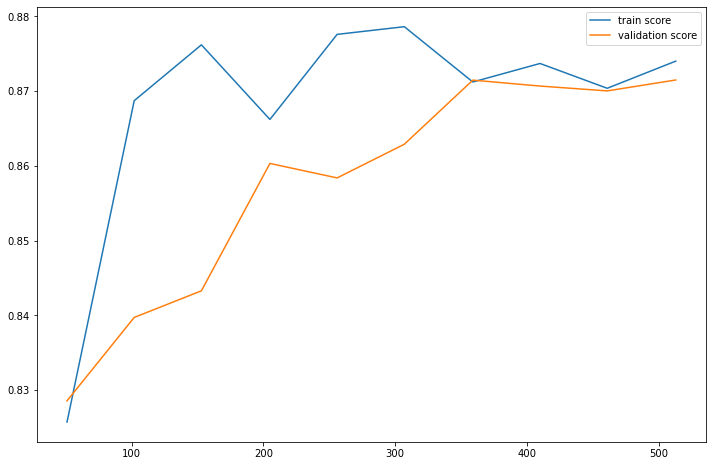

In [28]:
#Exécution de la fonction d'évaluation
model_1 = LogisticRegression(random_state=1)
evaluation(model_1)

----------------------------------------------------------------------
EVALUATION DU MODELE: DecisionTreeClassifier(random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[301   0]
 [  0 341]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 87  22]
 [ 47 120]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       109
           1       0.85      0.72      0.78       167

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75     

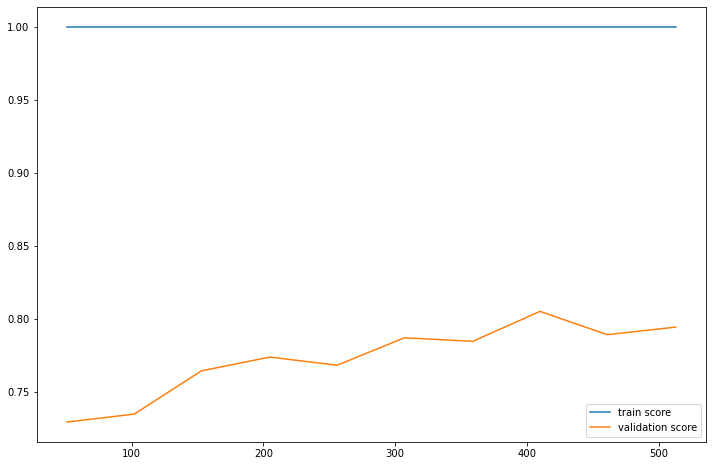

In [34]:
#Exécution de la fonction d'évaluation
model_2 = DecisionTreeClassifier(random_state=0)
evaluation(model_2)

----------------------------------------------------------------------
EVALUATION DU MODELE: SVC(kernel='linear', random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[251  50]
 [ 36 305]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       301
           1       0.86      0.89      0.88       341

    accuracy                           0.87       642
   macro avg       0.87      0.86      0.87       642
weighted avg       0.87      0.87      0.87       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 92  17]
 [ 19 148]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.90      0.89      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       

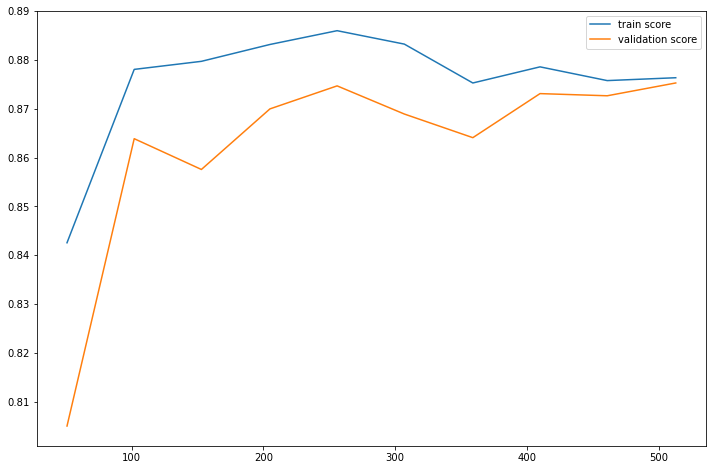

In [33]:
model_3 = SVC(kernel='linear', random_state=0)
evaluation(model_3)

----------------------------------------------------------------------
EVALUATION DU MODELE: SVC(random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[248  53]
 [ 21 320]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       301
           1       0.86      0.94      0.90       341

    accuracy                           0.88       642
   macro avg       0.89      0.88      0.88       642
weighted avg       0.89      0.88      0.88       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 93  16]
 [ 17 150]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.90      0.90      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg 

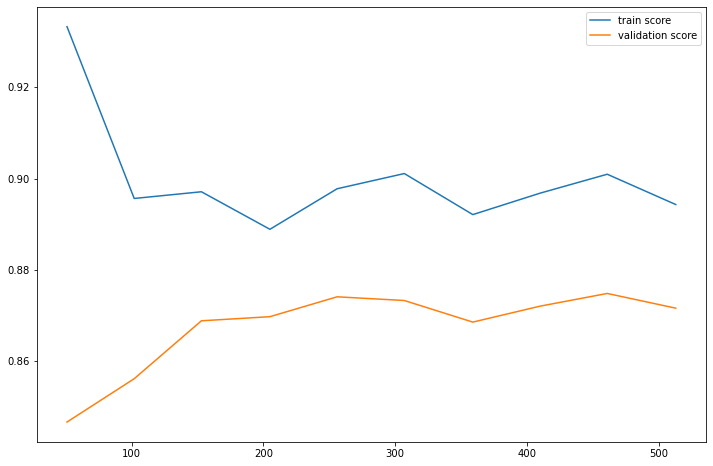

In [31]:
model_4 = SVC(kernel='rbf', random_state=0)
evaluation(model_4)

----------------------------------------------------------------------
EVALUATION DU MODELE: RandomForestClassifier(random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[301   0]
 [  0 341]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 94  15]
 [ 19 148]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.91      0.89      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87     

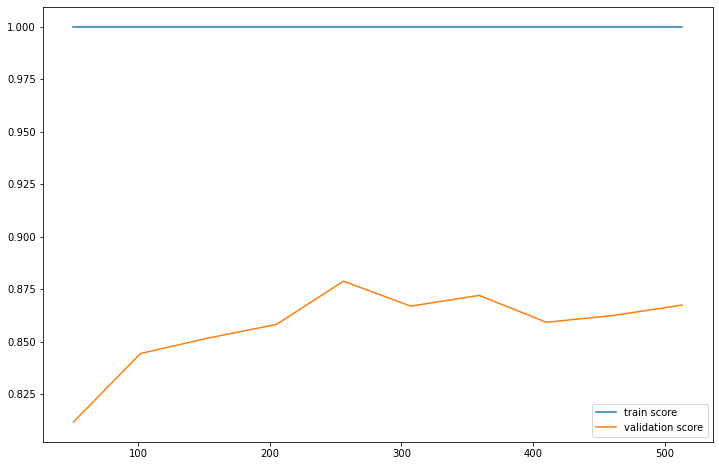

In [35]:
model_5 = RandomForestClassifier(random_state=0, n_estimators=100)
evaluation(model_5)

----------------------------------------------------------------------
EVALUATION DU MODELE: BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[252  49]
 [ 20 321]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       301
           1       0.87      0.94      0.90       341

    accuracy                           0.89       642
   macro avg       0.90      0.89      0.89       642
weighted avg       0.90      0.89      0.89       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 90  19]
 [ 20 147]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.89      0.88      0.88       167

    accuracy                    

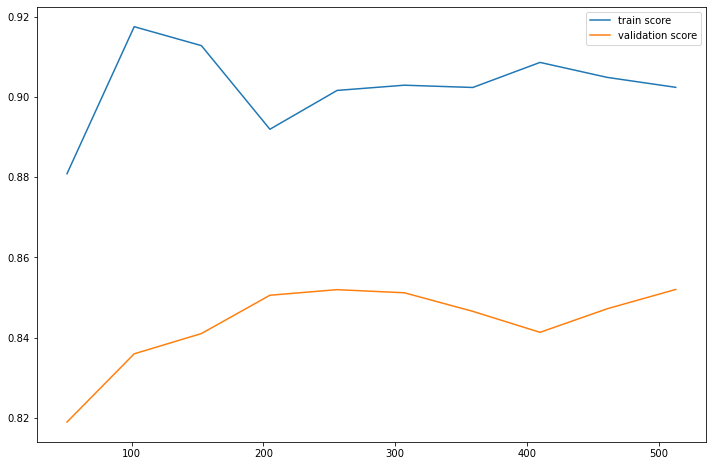

In [39]:

model_6 = BaggingClassifier(base_estimator= KNeighborsClassifier(), n_estimators=100, random_state=0)
evaluation(model_6)

----------------------------------------------------------------------
EVALUATION DU MODELE: AdaBoostClassifier(n_estimators=100, random_state=0) 

La matrice de confusion du modèle pour le trainset est: 
 [[263  38]
 [ 31 310]]

 Rapport total du modèle utilisé pour le trainset : 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       301
           1       0.89      0.91      0.90       341

    accuracy                           0.89       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.89      0.89      0.89       642
 


La matrice de confusion du modèle pour le testset est: 
 [[ 95  14]
 [ 28 139]]

 Rapport total du modèle utilisé pour le testset : 

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       109
           1       0.91      0.83      0.87       167

    accuracy                           0.85       276
   macro avg       0.84      0.85 

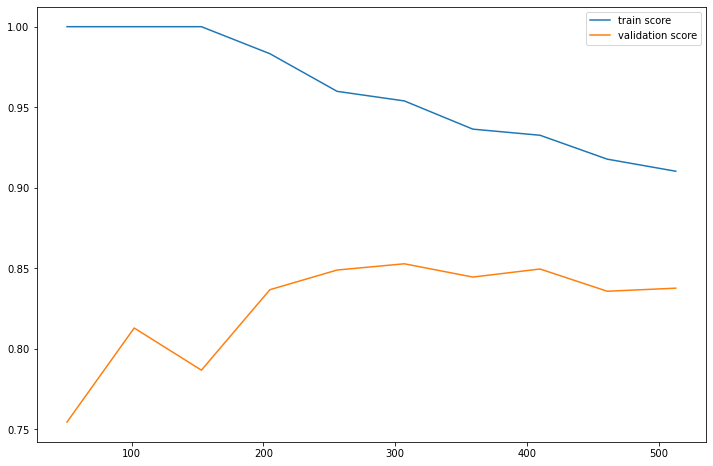

In [40]:
model_7 = AdaBoostClassifier(n_estimators=100, random_state=0)
evaluation(model_7)

# Amelioration de model

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
model = ExtraTreesClassifier()
model.fit(df2,Y) 
print(model.feature_importances_)

[0.05171798 0.11326164 0.03538308 0.11358465 0.25331553 0.06755719
 0.0681818  0.08925201 0.07818642 0.08554066 0.04401906]


In [45]:
b=[0.05171798, 0.11326164, 0.03538308, 0.11358465, 0.25331553, 0.06755719,
 0.0681818, 0.08925201, 0.07818642, 0.08554066, 0.04401906]
b.sort()
b

[0.03538308,
 0.04401906,
 0.05171798,
 0.06755719,
 0.0681818,
 0.07818642,
 0.08554066,
 0.08925201,
 0.11326164,
 0.11358465,
 0.25331553]